## Clean chapters
It is time to look at the chapters themselves. We already know that there are a lot of unnecessary newlines and spaces. So we start by removing them.

In [2]:
import pandas as pd

In [3]:
ch = pd.read_csv('data/df_filtered.csv')

In [12]:
#ch.chapter.str.len().describe()

In [13]:
#ch.year.describe()

In [14]:
#ch.year.value_counts()

In [15]:
#ch.loc[ch.year == 1805, 'author'].value_counts()

In [16]:
from matplotlib import pyplot as plt

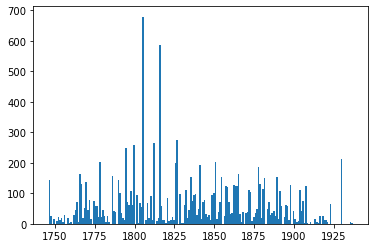

In [17]:
plt.hist(ch.year, bins=198)
plt.show()

# Simple base model
Today we'll get an MVP in a very simple fashion:

#### Tokenizing
- tokenize each chapter using the word_tokenize method from nltk
- keep tokens that have only letters with the string method .isalpha()
- keep chapters with enough tokens, say 50
- take the first 500 tokens for testing

#### Base model


In [4]:
import nltk
#nltk.download('punkt')

In [21]:
#tokens = nltk.tokenize.word_tokenize(test_chapter.lower(), language='german')

In [22]:
#fdist = nltk.FreqDist([word for word in tokens[:500] if word.isalpha()])

In [23]:
#fdist

In [1]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [5]:
ch['lemma'] = ch['chapter'].apply(lambda x: ' '.join([word.lemma_ for word in nlp(x)]))

KeyboardInterrupt: 

In [7]:
test_chap = ch.sample(100)

In [8]:
test_chap['lemma'] = test_chap['chapter'].apply(lambda x: ' '.join([word.lemma_ for word in nlp(x)]))

In [10]:
test_chap['tokens'] = test_chap['lemma'].apply(lambda x: nltk.tokenize.word_tokenize(x.lower(), language='german'))

In [11]:
test_chap['tokens'] = test_chap['tokens'].apply(lambda x: [word for word in x if word.isalpha()])

In [15]:
test_chap['fdist'] = test_chap['tokens'].apply(lambda x: nltk.FreqDist(x))

In [36]:
test_chap['lemma']

"als ich so weit schreiben haben -- führen mich Godwi nach der Bildersaal -- wir treten vor ein groß Gemählde -- er ziehen der Vorhang in der Höhe -- und wir sehen es stille an -- es stellen Wallpurgis und der Blume vor -- und sein von der nämlich Künstler -- der der Bild Annonciatens malen haben -- in derselbe Stil -- doch mystisch arbeiten -- so wie jener Allegorie der Leben -- so dieser Hindeut auf der Tod -- Jenes Bild haben mich heftig bewegen -- und in dieser lösen ich sich auf -- vor dieser Bild -- sagen ich zu Godwi -- können ein lieb Mädchen ruhig sterben -- alle schwinden -- es sein -- als vergehen es unter mein Auge -- der Farbe sein beweglich -- sie fliehen alle gegen der fern Glut der Himmel -- und scheinen schon in Nachklang zu wallen -- ich haben nicht denken -- daß der Abend so können fesseln werden -- wie er hier aus der dunkel Gewölbe der Baum dringen -- sein geheimnißreich Seele schleichen über der dicht belaubt Boden -- fließen mit leis Schimm an der schlank Blume h

In [37]:
doc = nlp(test_chap['lemma'][4780])

In [53]:
test = test_chap['lemma'][4780]

In [54]:
test = (test.replace('y', 'i')
       .replace('ß', 'ss')
       .replace('th', 't'))

In [55]:
test_token = nltk.tokenize.word_tokenize(test, language='german')
test_token = [word for word in test_token if word.isalpha()]
test = ' '.join([word for word in test_token])

In [60]:
doc = nlp(test)

In [57]:
len(test_token)

3098

In [66]:
for ent in doc.ents:
    if ent.label_ == 'PER':
        print(ent.text, ent.label_)

Wallpurgis PER
Godwi PER
Franzesko Fiormonti PER
Antonio PER
Jambe PER
Locke PER
Beruhet PER
Godwi PER
Ruhet PER
Wallpurgis PER
Godwi PER
Harfenspieler PER
Jüngling PER
bewegn PER
Jungfrau Gott PER
Vorüberging PER
respektabl PER
Helios PER
Stralet PER
Haines PER
Amaro Bitter PER
Zerrinn PER
Jungfrau PER
Weichet PER
Erblühn PER
Rose Rot dich PER
mein Lippe Strahlet PER
Düft PER
lind Sonnenstrale PER
dunkl PER
Erzeuget PER
Thran PER
Beweget von Weste PER
Locke Goldne PER
Ander PER
Löset PER
Düft PER
Glühet PER
Hüt PER
Locke PER
Italiäner PER
gehn Godwi PER
Georg der Diener PER


In [23]:
test_fdist = test_chap.reset_index()['fdist']

In [62]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [63]:
import matplotlib.pyplot as plt# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

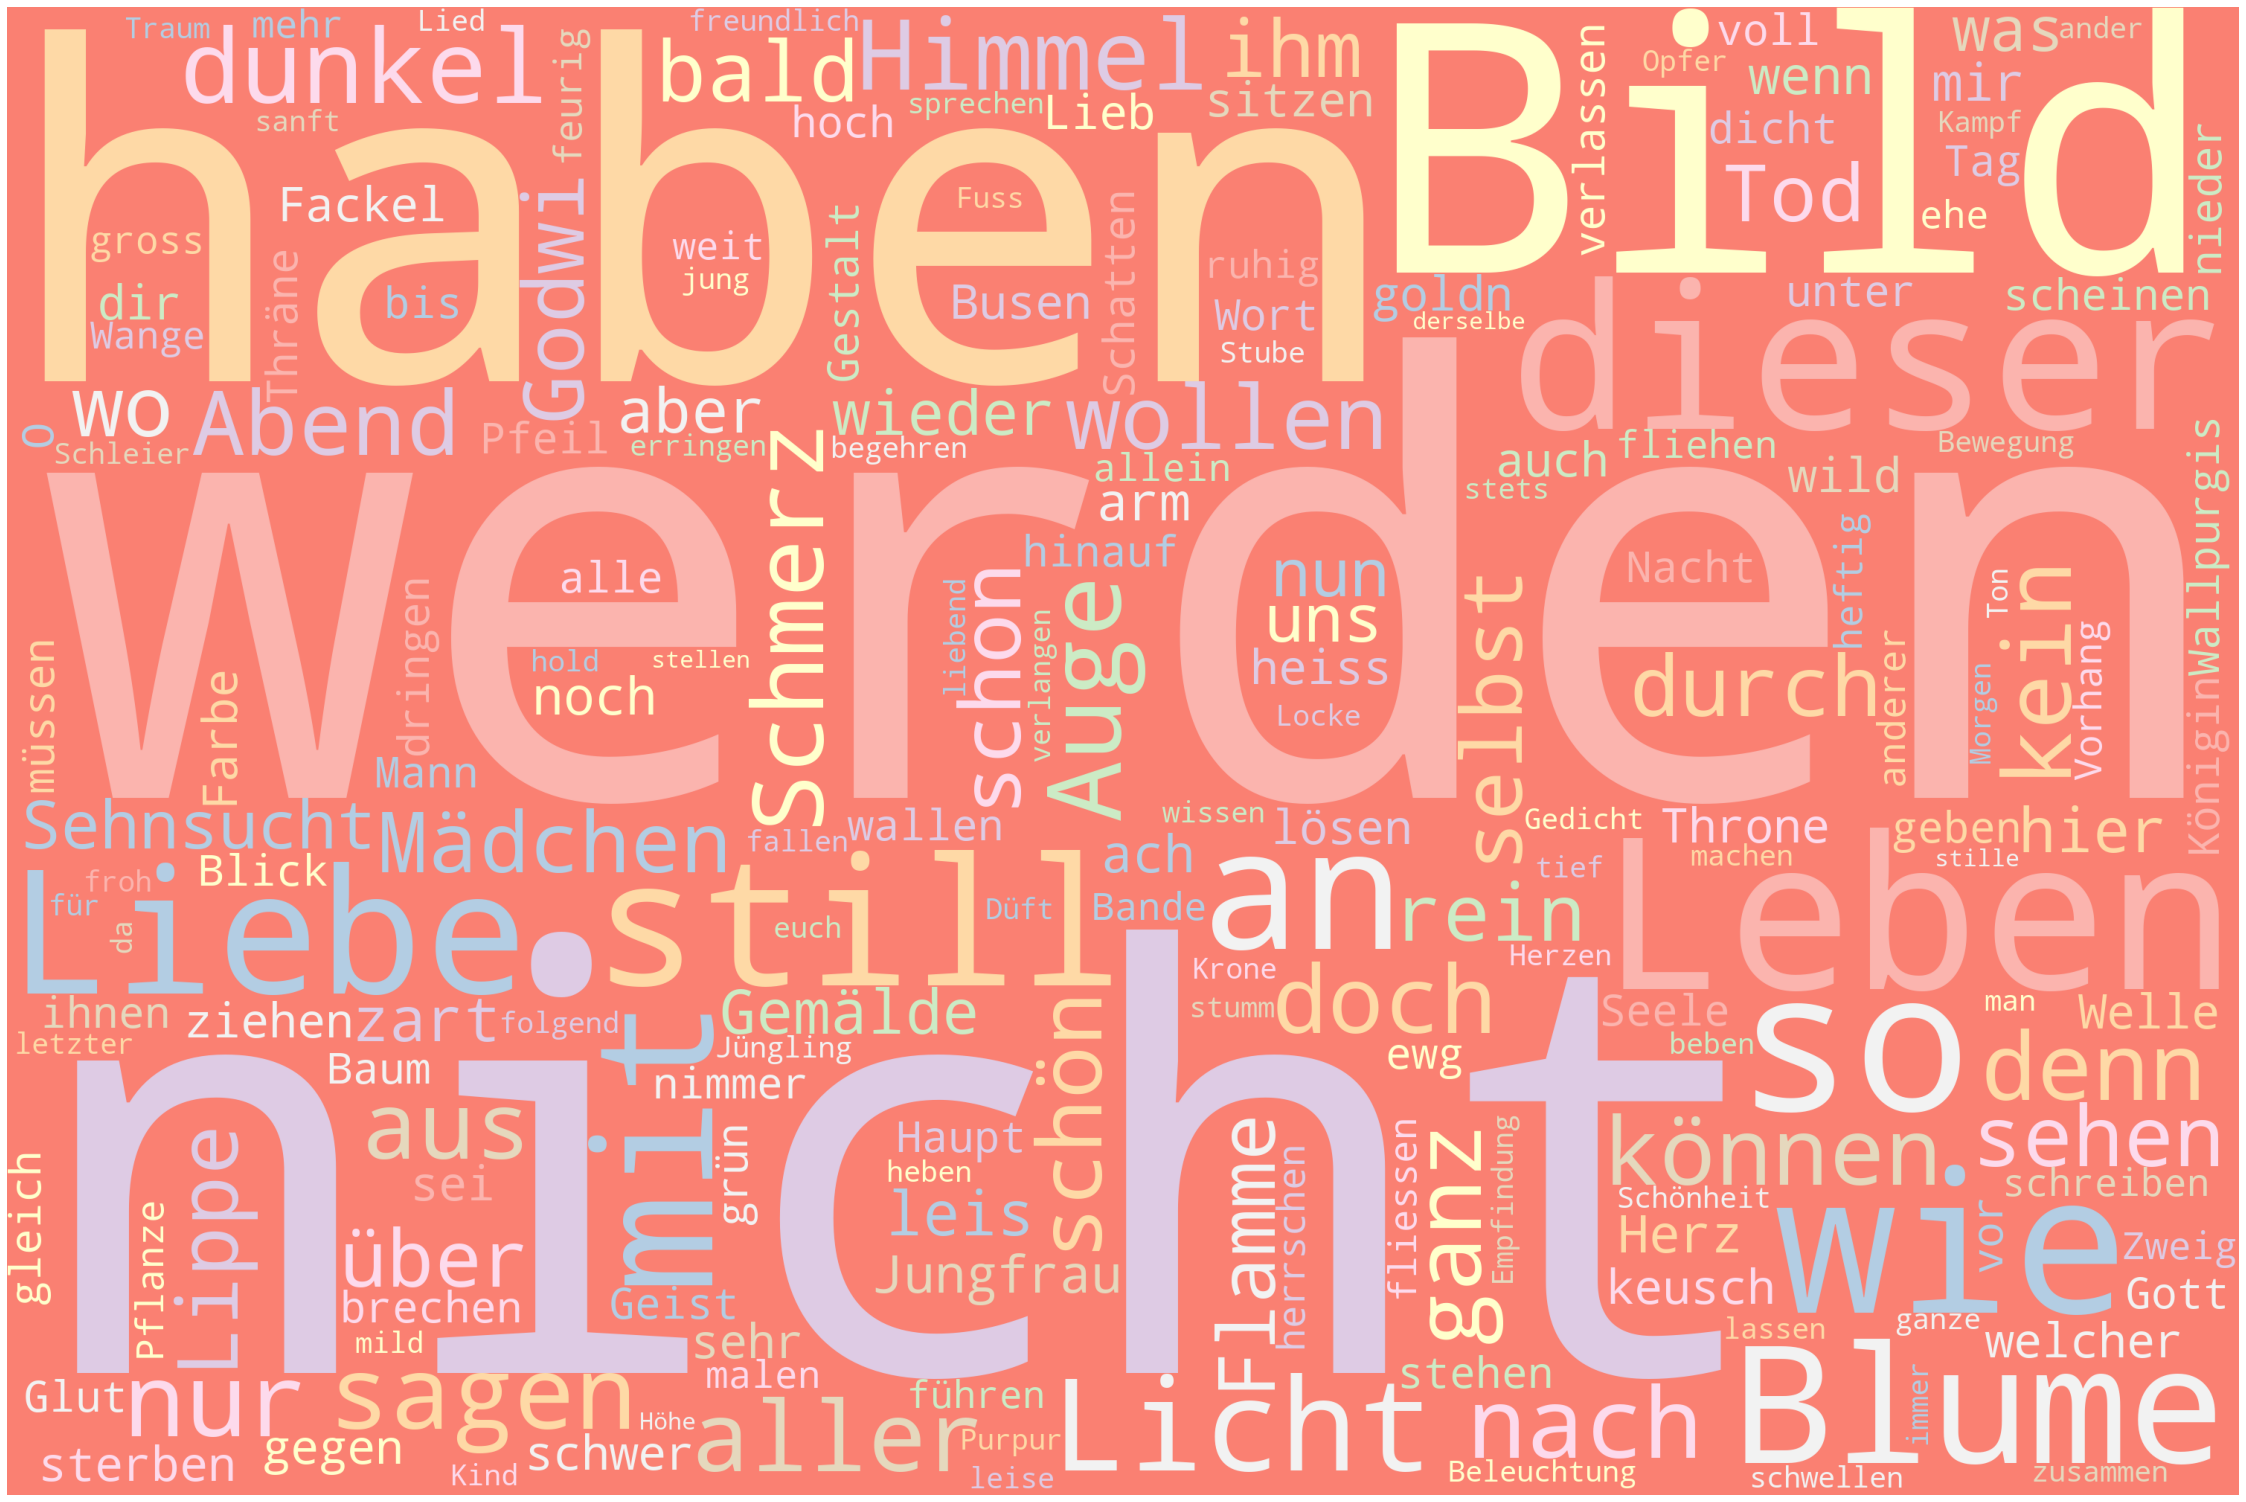

In [70]:
from wordcloud import WordCloud
wordcloud = WordCloud(width= 3000,
                      height = 2000,
                      random_state=1,
                      background_color='salmon',
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = stopwords).generate(test)# Plot
plot_cloud(wordcloud)

In [69]:
stopwords = ['der', 'dass', 'und', 'zu', 'von', 'auf', 'um',
             'ich', 'du', 'er', 'sie', 'es', 'wir', 'ihr',
             'sich', 'sein', 'mein', 'dein', 'dich', 'mich',
             'als', 'in', 'ein', 'an']

In [64]:
test

'als ich so weit schreiben haben führen mich Godwi nach der Bildersaal wir treten vor ein gross Gemählde er ziehen der Vorhang in der Höhe und wir sehen es stille an es stellen Wallpurgis und der Blume vor und sein von der nämlich Künstler der der Bild Annonciatens malen haben in derselbe Stil doch mistisch arbeiten so wie jener Allegorie der Leben so dieser Hindeut auf der Tod Jenes Bild haben mich heftig bewegen und in dieser lösen ich sich auf vor dieser Bild sagen ich zu Godwi können ein lieb Mädchen ruhig sterben alle schwinden es sein als vergehen es unter mein Auge der Farbe sein beweglich sie fliehen alle gegen der fern Glut der Himmel und scheinen schon in Nachklang zu wallen ich haben nicht denken dass der Abend so können fesseln werden wie er hier aus der dunkel Gewölbe der Baum dringen sein geheimnissreich Seele schleichen über der dicht belaubt Boden fliessen mit leis Schimm an der schlank Blume hinab und hinauf aus der Kelche zart Geist an der gross holdest Blume der ganz

In [29]:
test_fdist[10].most_common(50)

[('der', 48),
 ('ich', 35),
 ('ein', 27),
 ('zu', 25),
 ('sie', 25),
 ('und', 23),
 ('sein', 21),
 ('ihr', 16),
 ('in', 11),
 ('an', 9),
 ('schön', 9),
 ('nicht', 8),
 ('haben', 8),
 ('daß', 8),
 ('frau', 8),
 ('sich', 8),
 ('es', 7),
 ('sehen', 7),
 ('mein', 6),
 ('können', 6),
 ('mir', 6),
 ('mit', 6),
 ('euch', 6),
 ('sagen', 6),
 ('ufer', 5),
 ('mantel', 5),
 ('kommen', 5),
 ('mich', 5),
 ('gehen', 5),
 ('von', 5),
 ('nichts', 4),
 ('als', 4),
 ('oder', 4),
 ('so', 4),
 ('auf', 4),
 ('wieder', 4),
 ('auge', 4),
 ('sonne', 4),
 ('amme', 4),
 ('werden', 3),
 ('unter', 3),
 ('gewahr', 3),
 ('scheinen', 3),
 ('augenblick', 3),
 ('sand', 3),
 ('indessen', 3),
 ('alle', 3),
 ('wie', 3),
 ('noch', 3),
 ('ohne', 3)]

In [24]:
ch['tokens'] = ch['chapter'].apply(lambda x: nltk.tokenize.word_tokenize(x.lower(), language='german'))

In [25]:
ch['tokens'] = ch['tokens'].apply(lambda x: [word for word in x if word.isalpha()])

In [26]:
ch['token_num'] = ch['tokens'].apply(lambda x: len(x))

In [27]:
ch['token_num'].describe()

count    11412.000000
mean      1972.970820
std       2757.233646
min          0.000000
25%        413.000000
50%       1561.000000
75%       2419.250000
max      93052.000000
Name: token_num, dtype: float64

In [28]:
ch = ch.loc[~((ch.token_num < 100) &(ch.chapter_num == 0))]

In [29]:
ch = ch.loc[~(ch.token_num == 0)]

In [30]:
ch['token_num'].describe()

count    11252.000000
mean      2000.793192
std       2766.807870
min          1.000000
25%        455.000000
50%       1586.000000
75%       2431.500000
max      93052.000000
Name: token_num, dtype: float64

In [31]:
ch = ch.loc[~(ch.token_num < 50)]

In [32]:
ch.token_num.describe()

count    10963.000000
mean      2052.707288
std       2784.259775
min         50.000000
25%        532.500000
50%       1635.000000
75%       2461.000000
max      93052.000000
Name: token_num, dtype: float64

In [33]:
ch['test_tokens'] = ch.apply(lambda x: x.tokens[:500] if x.token_num > 500 else x.tokens, axis=1)

In [166]:
ch['decade'] = ch['year'].apply(lambda x: str(x)[:3] + '0s')

In [167]:
ch.decade.value_counts()

1800s    1154
1810s    1036
1850s     905
1790s     848
1870s     710
1770s     698
1880s     686
1860s     674
1830s     670
1820s     641
1840s     569
1760s     524
1890s     414
1900s     411
1780s     339
1930s     214
1740s     181
1750s     116
1910s      94
1920s      79
Name: decade, dtype: int64

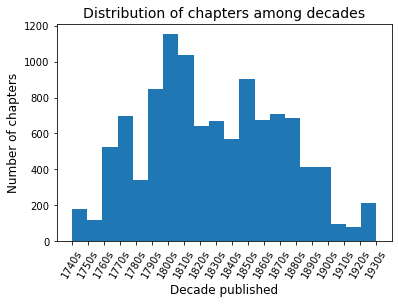

In [176]:
plt.hist(ch.decade.sort_values(), bins= 20)
plt.xticks(rotation = 60)
plt.xticks(['1740s', '1750s', '1760s', '1770s', '1780s', '1790s',
            '1800s', '1810s', '1820s', '1830s', '1840s', 
            '1850s', '1860s', '1870s', '1880s', '1890s', 
            '1900s', '1910s', '1920s', '1930s']) 
plt.xlabel('Decade published', fontsize=12)
plt.ylabel('Number of chapters', fontsize=12)
plt.title('Distribution of chapters among decades', fontsize=14)
plt.savefig('viz/chapter_decades_hist.png')
plt.show()

we see some issue here: a major part of the chapters was written in the 19th century. We don't care about that for now, but keep it in mind for later. Two solution could be:
- focus on the rich middle part: about 1760s - 1890s with a limit of about 500 chapters per decade
- collect data explicitly from decades that are misrepresented


In [37]:
ch['test_strings'] = ch['test_tokens'].apply(lambda x: ' '.join(x))

In [38]:
X = ch['test_strings']
y = ch['decade']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.85, random_state=42)

In [41]:
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(X_train)

In [42]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [43]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [44]:
X_test_counts = count_vector.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [45]:
y_pred = clf.predict(X_test_tfidf)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test, y_pred)

0.3513677811550152

In [136]:
import seaborn as sns

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
heat_data = confusion_matrix(y_test, y_pred)

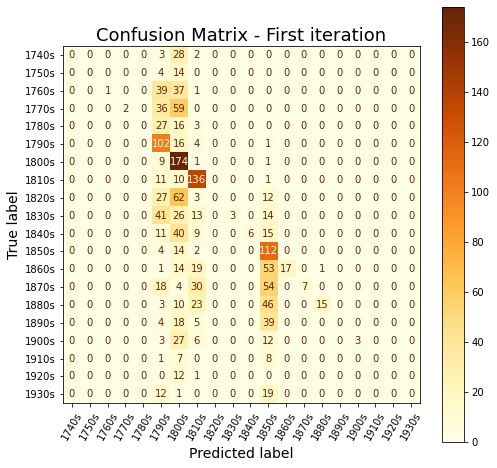

In [152]:
fig, ax = plt.subplots(figsize=(8,8))

disp = ConfusionMatrixDisplay(
    heat_data,
    display_labels = ['1740s', '1750s', '1760s', '1770s', '1780s', '1790s',
            '1800s', '1810s', '1820s', '1830s', '1840s', 
            '1850s', '1860s', '1870s', '1880s', '1890s', 
            '1900s', '1910s', '1920s', '1930s'])
disp.plot(ax=ax, xticks_rotation=60, cmap='YlOrBr')
plt.title('Confusion Matrix - First iteration', fontsize=18, pad=5)
plt.xlabel('Predicted label', fontsize=14, labelpad = 5)
plt.ylabel('True label', fontsize=14)
plt.savefig('viz/heatmap_iteration_1.png')
plt.show()

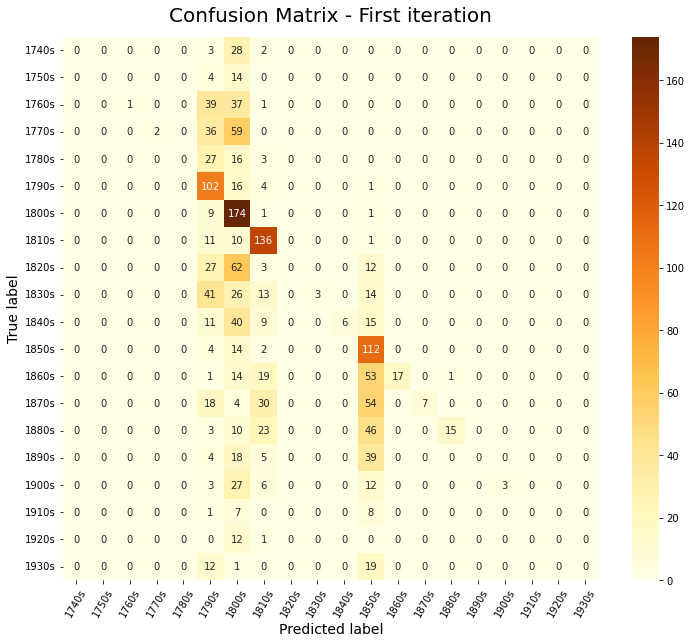

In [164]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data = heat_data, 
            cmap = 'YlOrBr',
            annot=True,
            fmt = 'd',
            xticklabels = ['1740s', '1750s', '1760s', '1770s', '1780s',
                           '1790s', '1800s', '1810s', '1820s', '1830s',
                           '1840s', '1850s', '1860s', '1870s', '1880s', 
                           '1890s', '1900s', '1910s', '1920s', '1930s'],
           yticklabels = ['1740s', '1750s', '1760s', '1770s', '1780s',
                           '1790s', '1800s', '1810s', '1820s', '1830s',
                           '1840s', '1850s', '1860s', '1870s', '1880s', 
                           '1890s', '1900s', '1910s', '1920s', '1930s']
           )


#disp.plot(ax=ax, xticks_rotation=60, cmap='YlOrBr')
plt.title('Confusion Matrix - First iteration', fontsize=20, pad=15.0)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xticks(rotation=60)
plt.savefig('viz/sns_heatmap_iteration_1.png')
plt.show()

In [53]:
ch.author.nunique()

41

from the value_counts of the test_data and from the heatmap it can be seen that our model likes to predict the decades that it has been fed the most.
But nonetheless: 35% accuracy.

better than random, so it could be worse :) I wished the predictions would have been closer to the principal diagonal of the heatmap though.

Interesting observation to note: The predicted labels for 2, 3, 9, 10, 12, 13, 16 (and almost 14) have all been correct! 

The corresponding decades are: 1760, 1770, 1830, 1840, 1860, 1870, 1900.

So the machine only used these labels if it was (almost) certain the label was correct! 
Maybe some works from these decade use quite unique words, that are not seen in other decades. These could very well be Character Names or places that were mentioned. If these special words are missing it takes the "safe" decades which the machine was trained with the most.

## Ideas for improvement:
- As mentioned before we saw that our data is skewed. We can collect more data or limit the amount of chapter from each decade.
- Get more authors in exchange for a maximum number of titles from each author for a more diverse training. Right now we only have 41 authors.
- Don't limit the number of tokens for training the model. Maybe because of the limited amount of words the AI could not get the 'essence' of the chapter for classification
- Try other classification models
- remove stop-words in preprocessing
- Remove Character names and names of places from the tokens.
- Try not to predict the decade but the era/period (e.g. baroque, classicism, romanticism). If some author has the most publications e.g. in the years 1809 - 1811, then the categorization into different decades seems arbitrary for the machine. Style differences among different eras (and therefore maybe also among authors) might be easier to grasp for classification models.

## Iteration using all the tokens


In [54]:
ch['strings'] = ch['tokens'].apply(lambda x: ' '.join(x))

In [55]:
X = ch.strings
y = ch.decade

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.85, random_state=42)

In [57]:
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(X_train)

In [58]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [59]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [60]:
X_test_counts = count_vector.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [61]:
y_pred = clf.predict(X_test_tfidf)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, y_pred)

0.3386018237082067

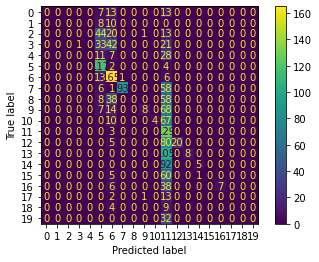

In [64]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
dist.plot()
plt.show()

-> not so great

But you can say that the same observations hold more or less true in this case

## Limit decades and train chapters

In [65]:
ch.decade.value_counts()

1800    1154
1810    1036
1850     905
1790     848
1870     710
1770     698
1880     686
1860     674
1830     670
1820     641
1840     569
1760     524
1890     414
1900     411
1780     339
1930     214
1740     181
1750     116
1910      94
1920      79
Name: decade, dtype: int64

In [66]:
ch_1790 = ch.loc[ch.decade == '1790'].sample(500)
ch_1800 = ch.loc[ch.decade == '1800'].sample(500)
ch_1810 = ch.loc[ch.decade == '1810'].sample(500)
ch_1820 = ch.loc[ch.decade == '1820'].sample(500)
ch_1830 = ch.loc[ch.decade == '1830'].sample(500)
ch_1840 = ch.loc[ch.decade == '1840'].sample(500)
ch_1850 = ch.loc[ch.decade == '1850'].sample(500)
ch_1860 = ch.loc[ch.decade == '1860'].sample(500)
ch_1870 = ch.loc[ch.decade == '1870'].sample(500)
ch_1880 = ch.loc[ch.decade == '1880'].sample(500)

In [67]:
df_list = [ch_1790, 
           ch_1800, 
           ch_1810, 
           ch_1820, 
           ch_1830, 
           ch_1840, 
           ch_1850, 
           ch_1860, 
           ch_1870, 
           ch_1880]

In [68]:
X = []
y = []
for df in df_list:
    X.extend(list(df.strings))
    y.extend(list(df.decade))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.85, random_state=42)

In [70]:
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(X_train)

In [71]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [72]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [73]:
X_test_counts = count_vector.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [74]:
y_pred = clf.predict(X_test_tfidf)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test, y_pred)

0.5346666666666666

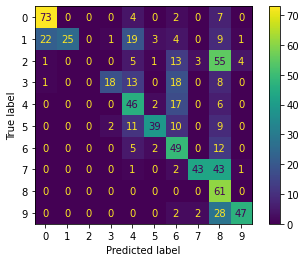

In [77]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
dist.plot()
plt.show()

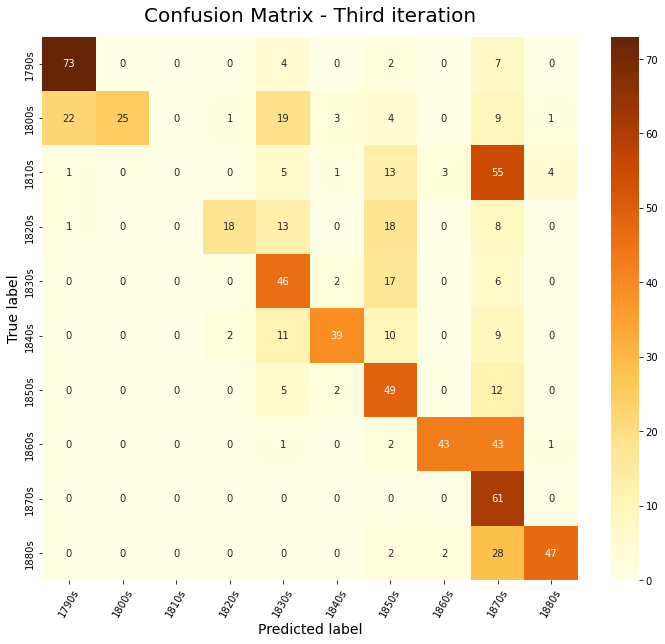

In [165]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data = confusion_matrix(y_test, y_pred), 
            cmap = 'YlOrBr',
            annot=True,
            fmt = 'd',
            xticklabels = ['1790s', '1800s', '1810s', '1820s', '1830s',
                           '1840s', '1850s', '1860s', '1870s', '1880s'],
           yticklabels = ['1790s', '1800s', '1810s', '1820s', '1830s',
                          '1840s', '1850s', '1860s', '1870s', '1880s']
           )


#disp.plot(ax=ax, xticks_rotation=60, cmap='YlOrBr')
plt.title('Confusion Matrix - Third iteration', fontsize=20, pad=15.0)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xticks(rotation=60)
plt.savefig('viz/sns_heatmap_iteration_3.png')
plt.show()